In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
pd.set_option('display.max_columns', None) 
import getpass  # To get the password without showing the input
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## 1 Getting the data

In [2]:
# reading the data
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 2 Cleaning the Data

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
# It is a good practice to set the ID as you df's index.
customer_df.set_index("Customer", inplace=True)

In [6]:
def data_clean(): # to standarize column names
    customer_df.columns = cc = [column.lower().replace(' ', '_') for column in customer_df] # standarizing the columns

In [7]:
data_clean() # to standarize the column names
customer_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
customer_df = customer_df.rename(columns={"employmentstatus": "employment_status"})

In [9]:
customer_df.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
# convert the "effective_to_date" column to "datetime format"
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"], format="%m/%d/%y")

In [11]:
numerical_df = customer_df.select_dtypes(include=['number'])
numerical_df.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
categorical_df = customer_df.select_dtypes(include='object')
categorical_df.head(5)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [13]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces. This function finds null values, empty strings and duplicated rows --> thank you isi for sharing this masterpiece!
    
    duplicate_rows = data.duplicated().sum() # check duplicated data (rows)
    nan_values = data.isna().sum() # check null
    empty_spaces = data.eq(' ').sum() # check whitespace/empty string
    
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f" Found {data.duplicated().sum()} duplicated rows.")
    return exploration

explore_data(categorical_df)

 Found 340 duplicated rows.


,NaN,EmptySpaces
state,0,0
response,0,0
coverage,0,0
education,0,0
employment_status,0,0
gender,0,0
location_code,0,0
marital_status,0,0
policy_type,0,0
policy,0,0


It is important to carefully investigate the duplicates and understand why they exist before deciding whether to drop them or not. In some cases, it may be more appropriate to keep all the duplicates or to aggregate them in some way to obtain a more meaningful representation of the data.

In [14]:
# calling the function above to check the whole data frame (customer_df) for duplicated, NaN & Empty string

explore_data(customer_df)

 Found 163 duplicated rows.


,NaN,EmptySpaces
state,0,0
customer_lifetime_value,0,0
response,0,0
coverage,0,0
education,0,0
effective_to_date,0,0
employment_status,0,0
gender,0,0
income,0,0
location_code,0,0


Here we see fewer duplicated rows. Therefore, we do not drop those 340 rows we found duplicated in categorical_df.

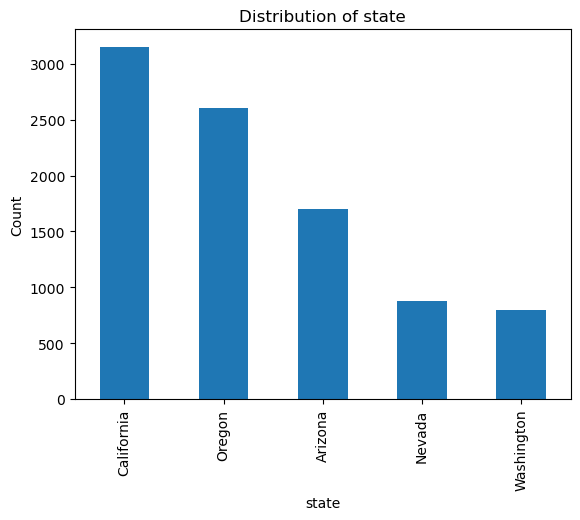

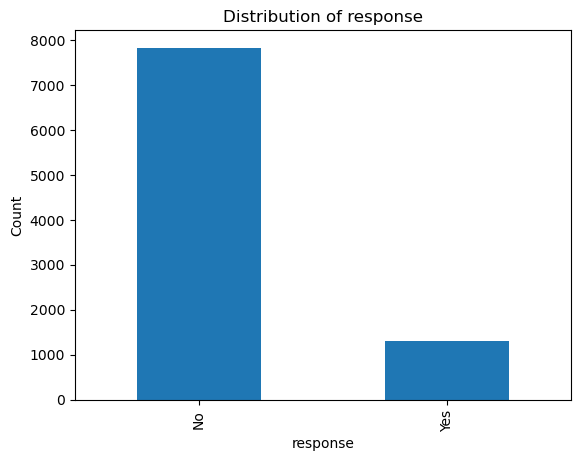

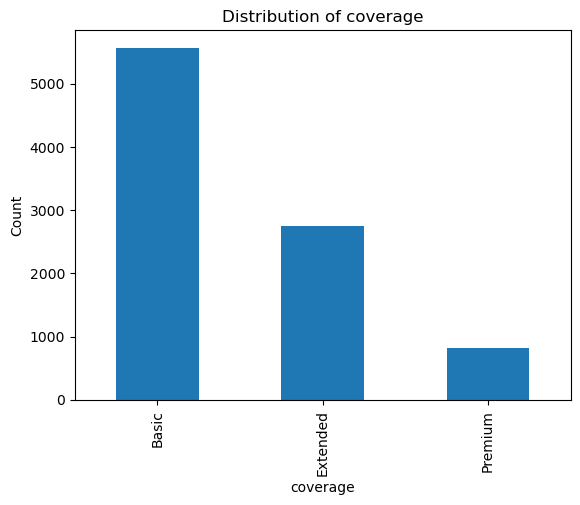

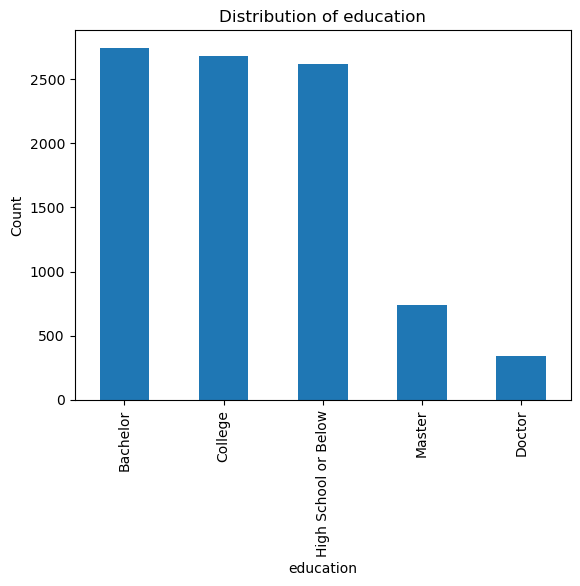

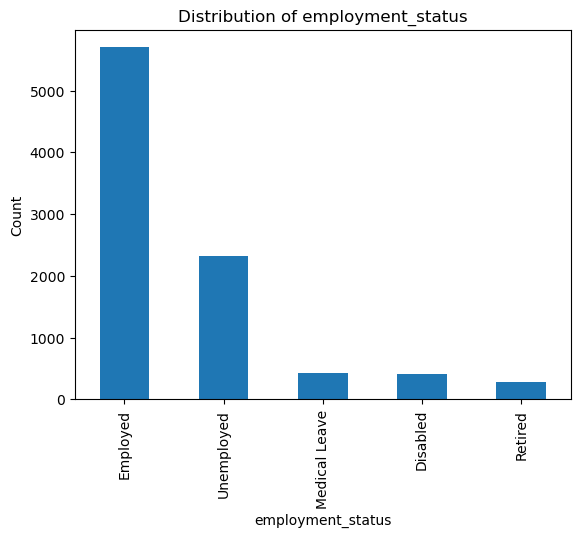

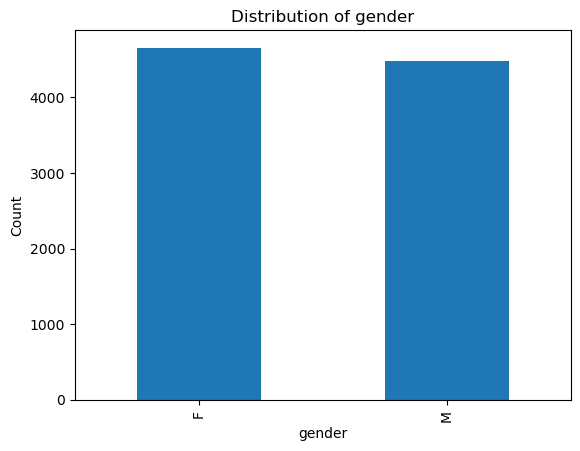

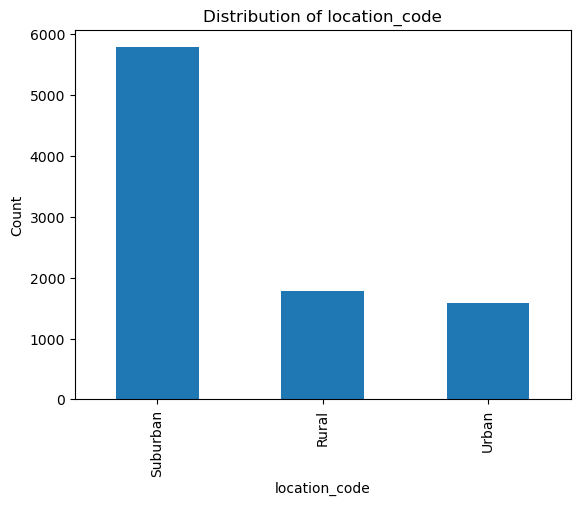

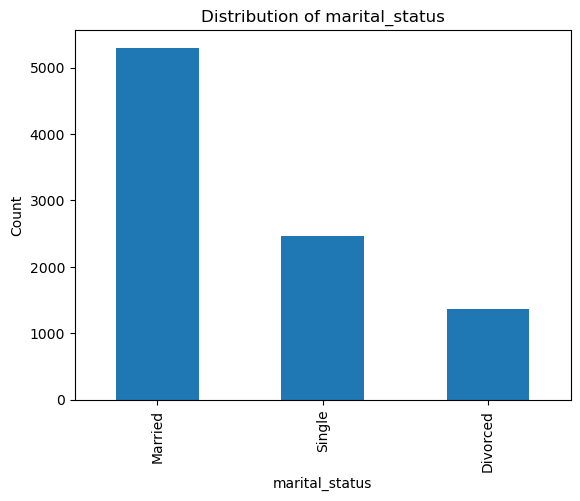

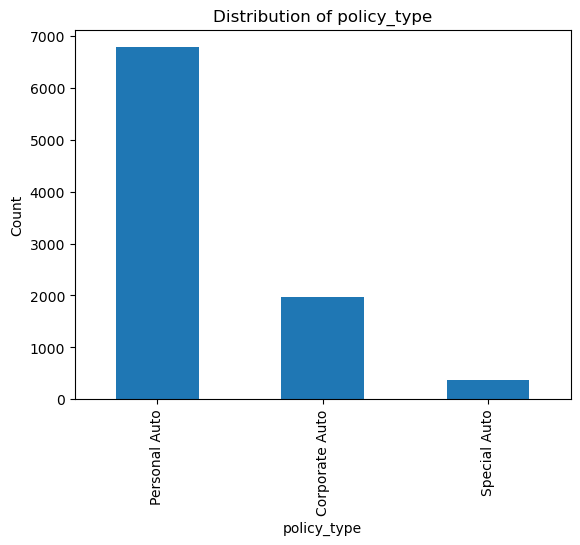

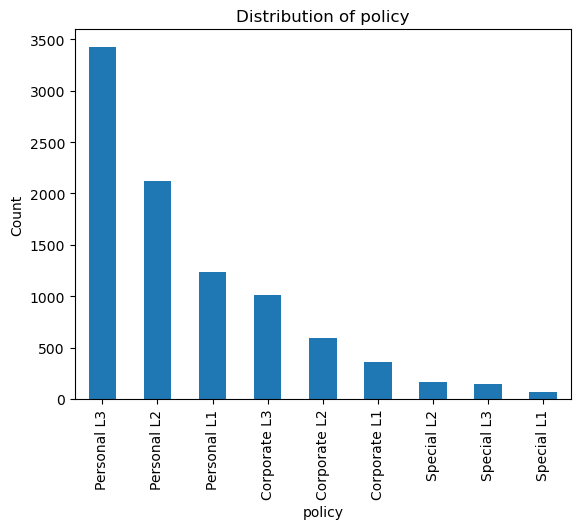

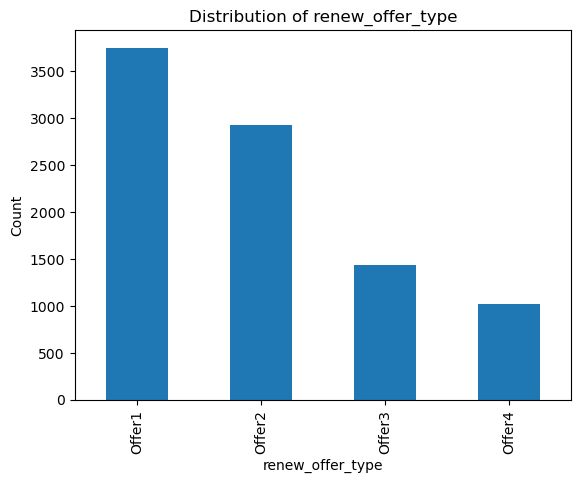

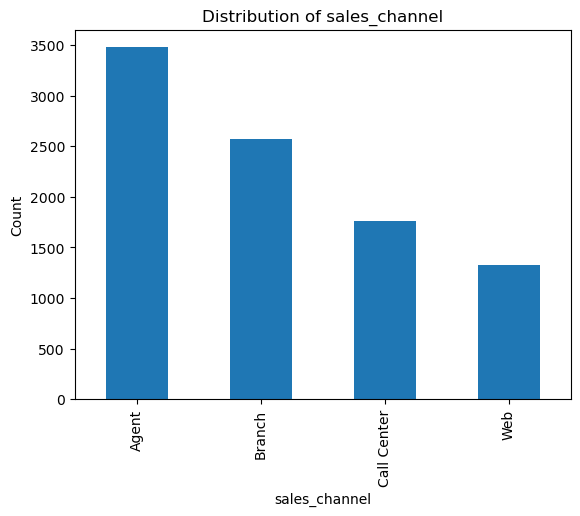

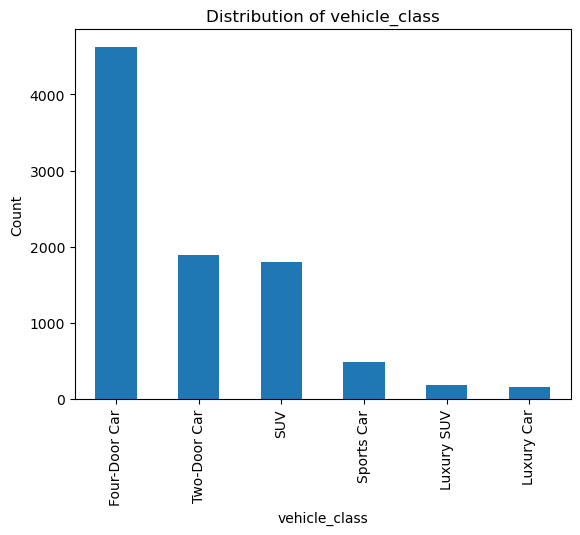

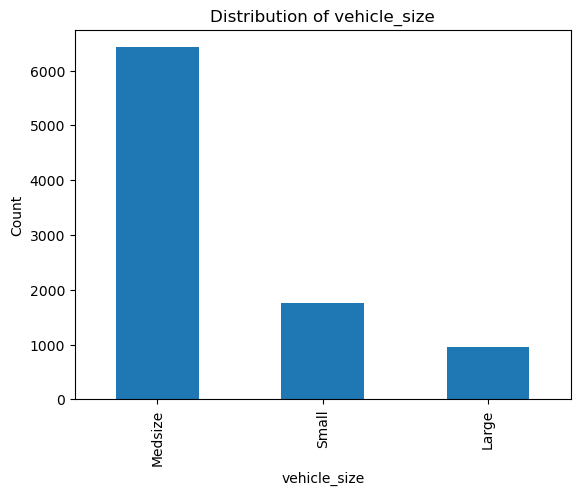

In [15]:
# Plot all the categorical variables with the proper plot
for col in categorical_df.columns:
    plt.figure()
    customer_df[col].value_counts().plot(kind="bar")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.show()

# Start of Lab

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [16]:
def plot_boxplots(df):
    for col in df.columns:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

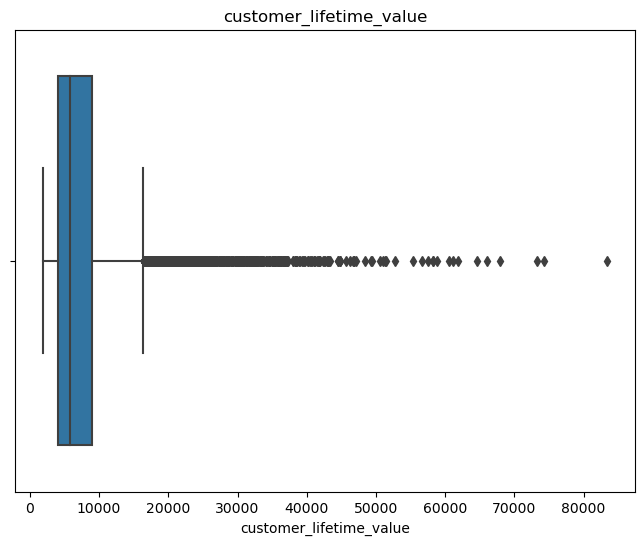

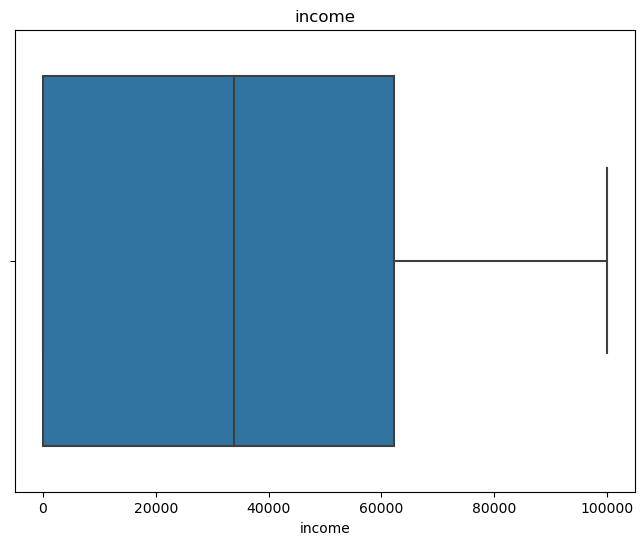

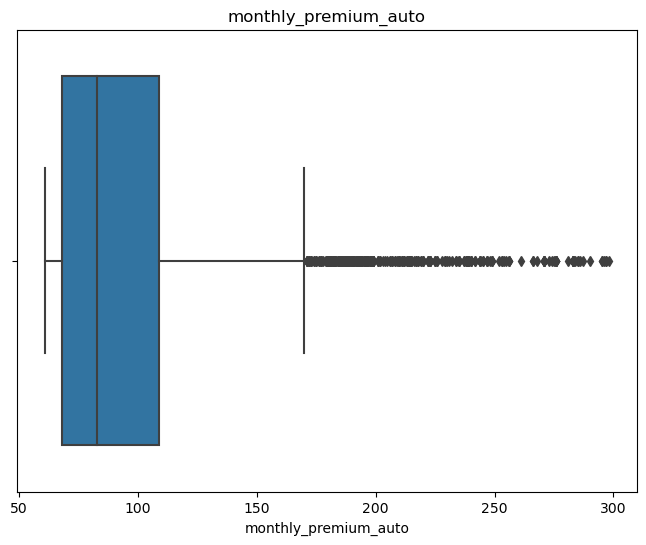

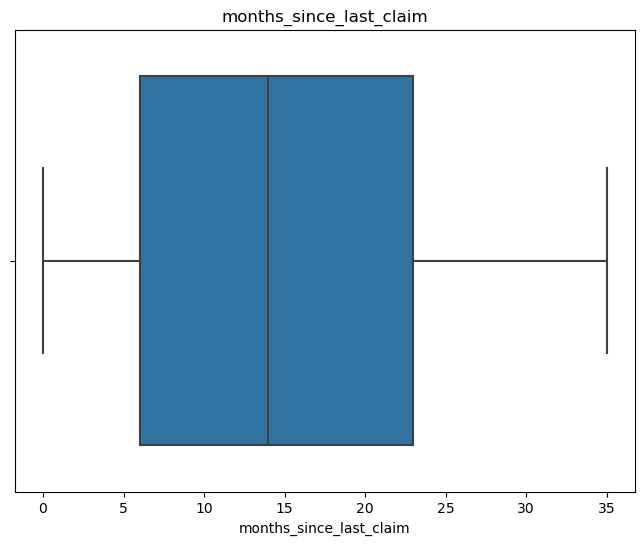

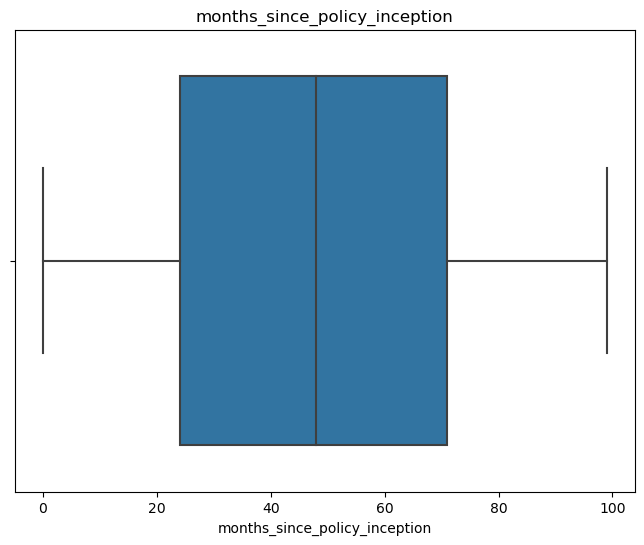

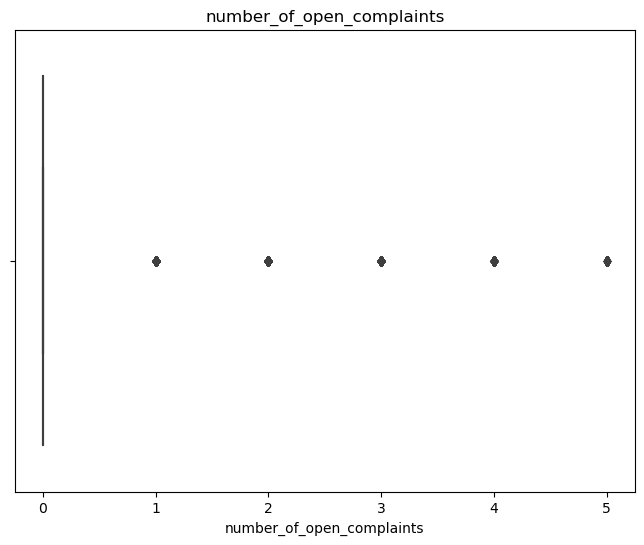

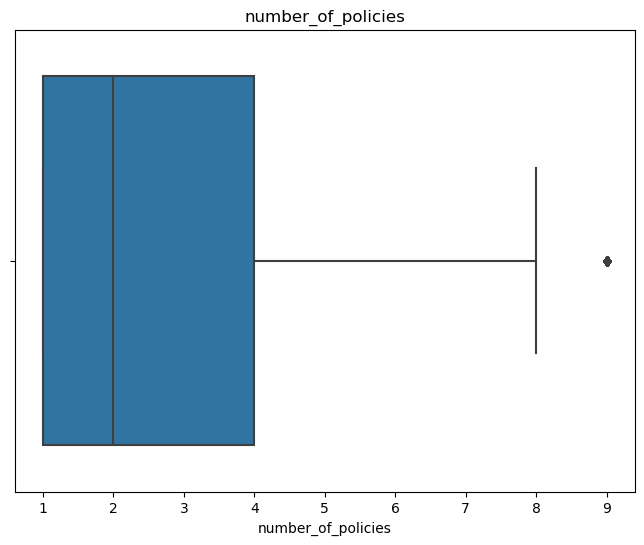

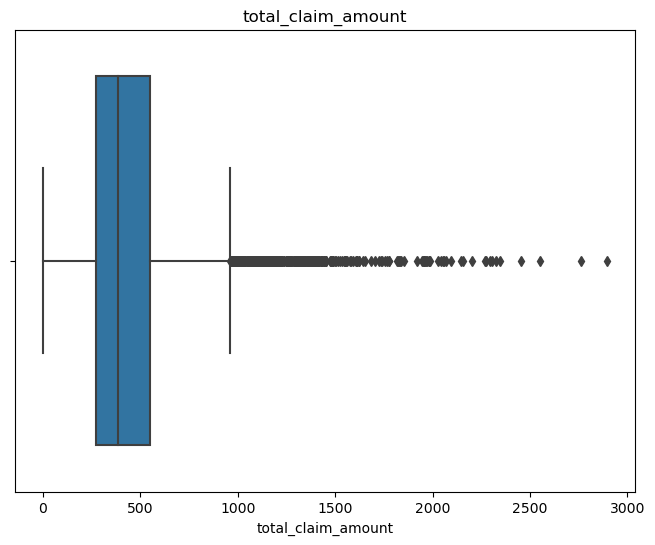

In [17]:
plot_boxplots(numerical_df)

customer_lifetime_value, monthly_premium_auto and total_claim_amount have outliers which do not look very heavy. Before I remove outliers I want to continue with the data cleaning process and check how the model performs.

2. Create a copy of the dataframe for the data wrangling.

In [18]:
customer_df_2 = customer_df.copy()
customer_df_2.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. Normalize the continuous variables. You can use any one method you want.

In [19]:
date=customer_df_2[["effective_to_date"]].copy()
date.head()

,effective_to_date
Customer,
BU79786,2011-02-24
QZ44356,2011-01-31
AI49188,2011-02-19
WW63253,2011-01-20
HB64268,2011-02-03


In [20]:
numerical_df_2 = customer_df_2.select_dtypes(include=['number'])
numerical_df_2.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


customer_lifetime_value and total_claim_amount are continuous variables. I don´t want to normalize the target variable and only focus on customer_lifetime_value

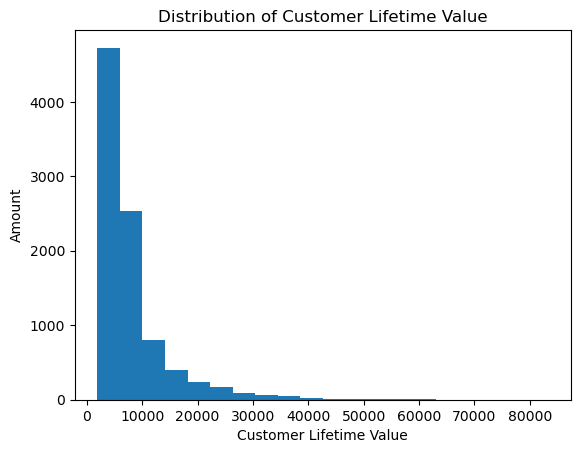

In [21]:
# customer_lifetime_value before normalization

plt.hist(customer_df_2["customer_lifetime_value"], bins=20)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Amount")
plt.title("Distribution of Customer Lifetime Value")
plt.show()

In [22]:
# normalize the continuous variables using MinMaxScaler
scaler = MinMaxScaler()
customer_df_2["customer_lifetime_value"] = scaler.fit_transform(customer_df_2[["customer_lifetime_value"]])

4. Encode the categorical variables

In [23]:
categorical_df_2 = customer_df_2.select_dtypes(include='object')
categorical_df_2.head(5)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Let´s start with ordinal encoding

In [24]:
categorical_df_2['response'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
binary = {'No' : 0, 'Yes' : 1}
categorical_df_2['response'].replace(binary, inplace=True)
categorical_df_2['response'].unique()

array([0, 1], dtype=int64)

In [26]:
categorical_df_2['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [27]:
ordinal = {'Basic' : 0, 'Extended' : 1, 'Premium' : 2}
categorical_df_2['coverage'].replace(ordinal, inplace=True)
categorical_df_2['coverage'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
categorical_df_2['employment_status'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [29]:
ordinal = {'Employed' : 0, 'Unemployed' : 1, 'Medical Leave' : 2, 'Disabled' : 3, 'Retired' : 4}
categorical_df_2['employment_status'].replace(ordinal, inplace=True)
categorical_df_2['employment_status'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [30]:
categorical_df_2['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [31]:
ordinal = {'Suburban' : 0, 'Rural' : 1, 'Urban' : 2}
categorical_df_2['location_code'].replace(ordinal, inplace=True)
categorical_df_2['location_code'].unique()

array([0, 1, 2], dtype=int64)

In [32]:
categorical_df_2['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [33]:
ordinal = {'Small' : 0, 'Medsize' : 1, 'Large' : 2}
categorical_df_2['vehicle_size'].replace(ordinal, inplace=True)
categorical_df_2['vehicle_size'].unique()

array([1, 0, 2], dtype=int64)

Now I split the categoricals into encoded and not encoded before applying get dummies

In [34]:
categorical_df_2_encoded = categorical_df_2.select_dtypes(include = np.number)
categorical_df_2_encoded.head(3)

,response,coverage,employment_status,location_code,vehicle_size
Customer,,,,,
BU79786,0,0,0,0,1
QZ44356,0,1,1,0,1
AI49188,0,2,0,0,1


In [35]:
# the categoricals which need to be encoded
categorical_df_2_to_be_encoded = categorical_df_2.select_dtypes(exclude = np.number)
categorical_df_2_to_be_encoded.head(3)

,state,education,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
Customer,,,,,,,,,
BU79786,Washington,Bachelor,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
QZ44356,Arizona,Bachelor,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
AI49188,Nevada,Bachelor,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car


In [36]:
# Apply get_dummies on them
categorical_df_2_encoded_2 = pd.get_dummies(categorical_df_2_to_be_encoded, drop_first=False)
categorical_df_2_encoded_2.sample(5)

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KM52241,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
YY71144,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
DP84567,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
BH60627,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
LI10567,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [37]:
# Concat encoded categoricals
categorical_df_2_encoded_final = pd.concat([categorical_df_2_encoded, categorical_df_2_encoded_2], axis=1)
categorical_df_2_encoded_final.head()

,response,coverage,employment_status,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
QZ44356,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
AI49188,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
WW63253,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
HB64268,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [38]:
# Concat encoded date, categoricals and numericals
customer_df_2_encoded = pd.concat([numerical_df_2, categorical_df_2_encoded_final, date], axis=1)
customer_df_2_encoded.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,coverage,employment_status,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,effective_to_date
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011-02-24
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2011-01-31
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011-02-19
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,2011-01-20
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2011-02-03


5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [39]:
customer_df_2_encoded['effective_to_date_year'] = customer_df_2['effective_to_date'].dt.year
customer_df_2_encoded['effective_to_date_month'] = customer_df_2['effective_to_date'].dt.month
customer_df_2_encoded['effective_to_date_weekday'] = customer_df_2['effective_to_date'].dt.day
customer_df_2_encoded.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,coverage,employment_status,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,effective_to_date,effective_to_date_year,effective_to_date_month,effective_to_date_weekday
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011-02-24,2011,2,24
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2011-01-31,2011,1,31
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011-02-19,2011,2,19
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,2011-01-20,2011,1,20
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2011-02-03,2011,2,3


In [40]:
# Drop `effective_to_date`
customer_df_2_encoded = customer_df_2_encoded.drop(['effective_to_date'], axis=1)
customer_df_2_encoded.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response,coverage,employment_status,location_code,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,effective_to_date_year,effective_to_date_month,effective_to_date_weekday
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011,2,24
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,2011,1,31
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2011,2,19
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,2011,1,20
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,2011,2,3


6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [42]:
customer_df_2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_lifetime_value         9134 non-null   float64
 1   income                          9134 non-null   int64  
 2   monthly_premium_auto            9134 non-null   int64  
 3   months_since_last_claim         9134 non-null   int64  
 4   months_since_policy_inception   9134 non-null   int64  
 5   number_of_open_complaints       9134 non-null   int64  
 6   number_of_policies              9134 non-null   int64  
 7   total_claim_amount              9134 non-null   float64
 8   response                        9134 non-null   int64  
 9   coverage                        9134 non-null   int64  
 10  employment_status               9134 non-null   int64  
 11  location_code                   9134 non-null   int64  
 12  vehicle_size                  

### All columns are numerical!